In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
# Step 1: Load the Data
df = pd.read_csv('../4-processData/features.csv')

In [3]:
# Step 2: Split the Data
X = df.drop('label', axis=1)  # Features
y = df['label']  # Labels

In [4]:
# Step 3: Train the Random Forest Classifier with Grid Search
param_grid = {
    'n_estimators': range(10, 50),
    'max_leaf_nodes': range(10, 50),
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, n_jobs=-1)  # 5-fold cross-validation
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_leaf_nodes': range(10, 50),
                         'n_estimators': range(10, 50)})

In [5]:
# Get results sorted by mean test score
results = pd.DataFrame(grid_search.cv_results_)
results_sorted = results.sort_values(by='mean_test_score', ascending=False)

# Print top 10 combinations of parameters with their score
print("Top 20 Parameter Combinations:")
for index, row in results_sorted.head(20).iterrows():
    print(f"Parameters: {row['params']}, Mean Test Score: {row['mean_test_score']}")

Top 20 Parameter Combinations:
Parameters: {'max_leaf_nodes': 49, 'n_estimators': 36}, Mean Test Score: 0.9155555555555555
Parameters: {'max_leaf_nodes': 49, 'n_estimators': 38}, Mean Test Score: 0.9155555555555555
Parameters: {'max_leaf_nodes': 33, 'n_estimators': 29}, Mean Test Score: 0.9144444444444444
Parameters: {'max_leaf_nodes': 45, 'n_estimators': 38}, Mean Test Score: 0.9144444444444444
Parameters: {'max_leaf_nodes': 37, 'n_estimators': 29}, Mean Test Score: 0.9144444444444444
Parameters: {'max_leaf_nodes': 47, 'n_estimators': 38}, Mean Test Score: 0.9144444444444444
Parameters: {'max_leaf_nodes': 48, 'n_estimators': 36}, Mean Test Score: 0.9144444444444444
Parameters: {'max_leaf_nodes': 46, 'n_estimators': 36}, Mean Test Score: 0.9144444444444444
Parameters: {'max_leaf_nodes': 46, 'n_estimators': 38}, Mean Test Score: 0.9144444444444444
Parameters: {'max_leaf_nodes': 37, 'n_estimators': 31}, Mean Test Score: 0.9144444444444444
Parameters: {'max_leaf_nodes': 37, 'n_estimators'

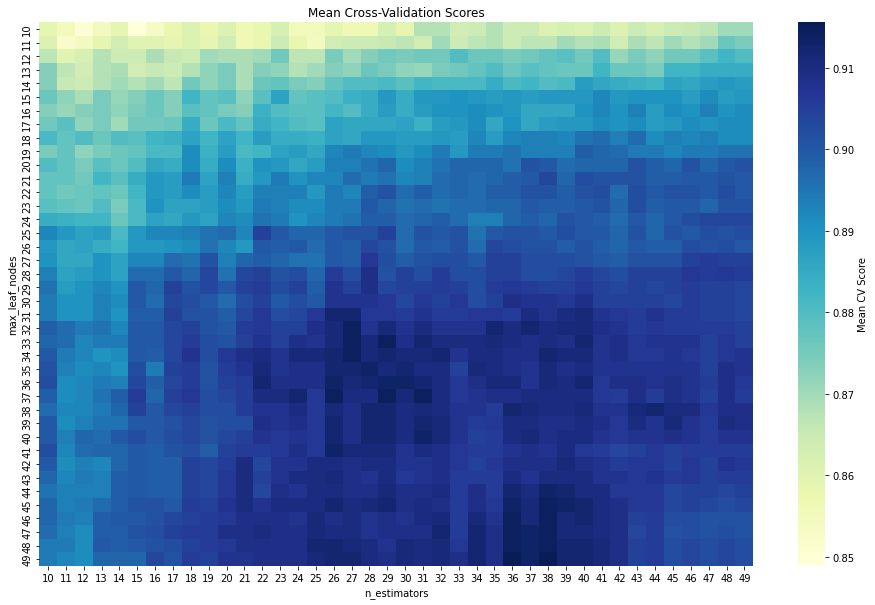

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pivot the results DataFrame to get mean test scores for each pair of max_leaf_nodes and n_estimators
pivot_table = results.pivot(index='param_max_leaf_nodes', columns='param_n_estimators', values='mean_test_score')

# Plotting the heatmap
plt.figure(figsize=(16, 10))  # Increase the size of the plot
sns.heatmap(pivot_table, annot=False, cmap='YlGnBu', cbar_kws={'label': 'Mean CV Score'})  # Remove annotations
plt.title('Mean Cross-Validation Scores')
plt.xlabel('n_estimators')
plt.ylabel('max_leaf_nodes')
plt.show()


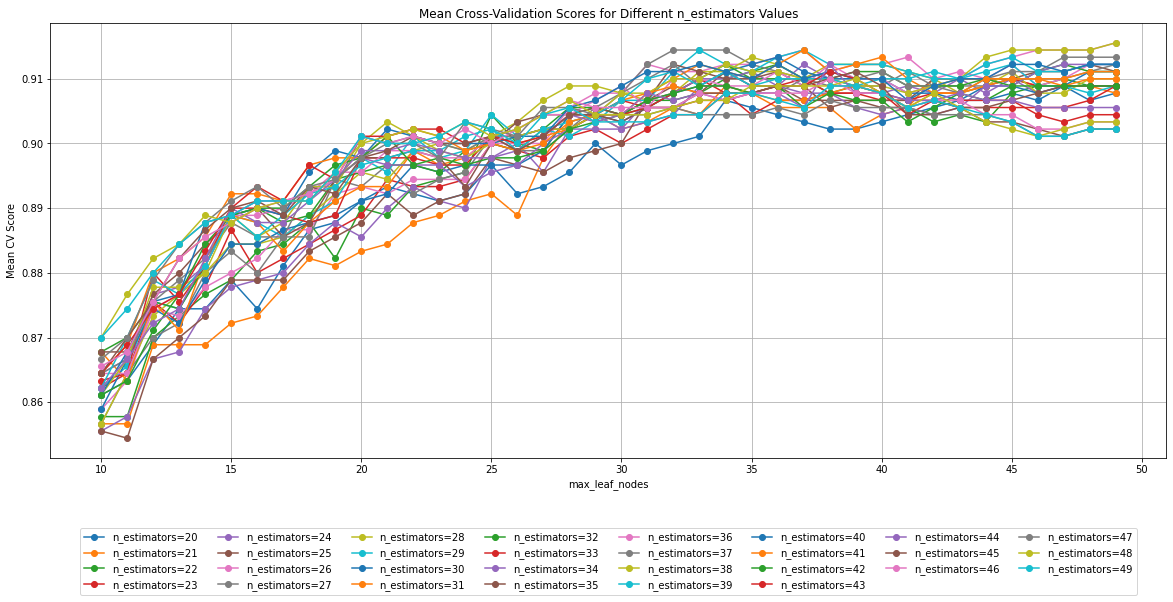

In [45]:
import matplotlib.pyplot as plt

# Define the range of n_estimators values
n_estimators_range = range(20, 50)

# Plotting the line plot for each n_estimators value
plt.figure(figsize=(20, 8))  # Increased height to accommodate the legend
for n_estimators_value in n_estimators_range:
    filtered_results = results[results['param_n_estimators'] == n_estimators_value]
    plt.plot(filtered_results['param_max_leaf_nodes'], filtered_results['mean_test_score'], marker='o', label=f'n_estimators={n_estimators_value}')

plt.title('Mean Cross-Validation Scores for Different n_estimators Values')
plt.xlabel('max_leaf_nodes')
plt.ylabel('Mean CV Score')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=8)
plt.grid(True)
plt.show()


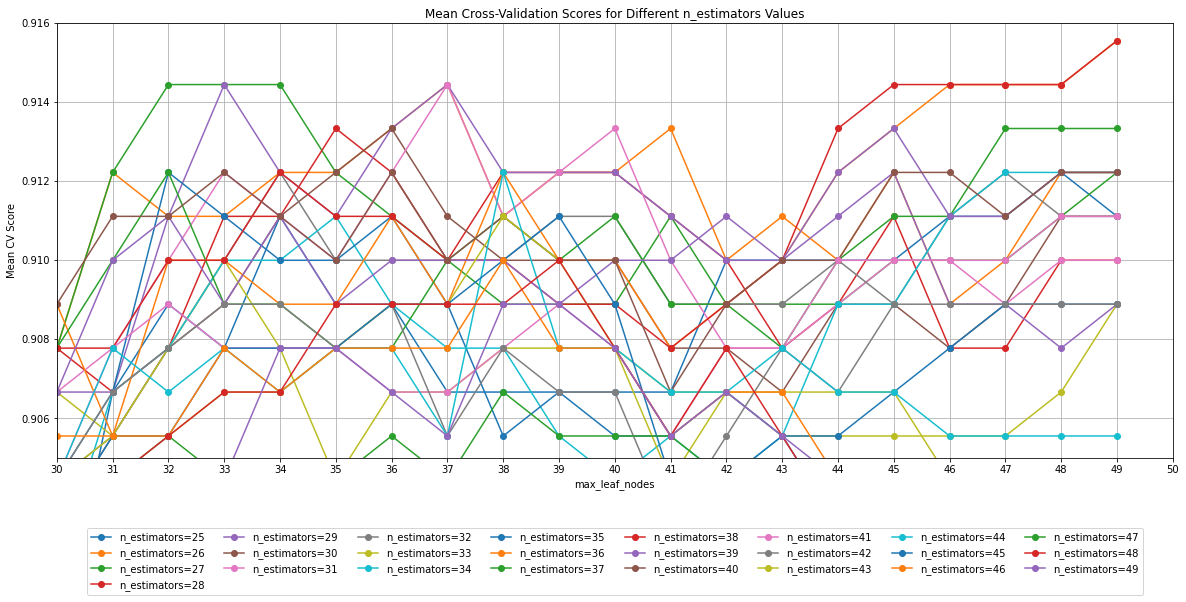

In [50]:
import matplotlib.pyplot as plt

n_estimators_range = range(25, 50)

plt.figure(figsize=(20, 8))  # Increased height to accommodate the legend
for n_estimators_value in n_estimators_range:
    filtered_results = results[results['param_n_estimators'] == n_estimators_value]
    plt.plot(filtered_results['param_max_leaf_nodes'], filtered_results['mean_test_score'], marker='o', label=f'n_estimators={n_estimators_value}')

plt.title('Mean Cross-Validation Scores for Different n_estimators Values')
plt.xlabel('max_leaf_nodes')
plt.ylabel('Mean CV Score')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=8)
plt.grid(True)
plt.xticks(range(30, 51))
plt.axis([30, 50, 0.905, 0.916])
plt.show()


In [9]:
# Train the model with the best parameters
best_rf_classifier = grid_search.best_estimator_
best_rf_classifier

RandomForestClassifier(max_leaf_nodes=49, n_estimators=36, random_state=42)

In [35]:
# Parametres a provar:
# N estimators = 10 & Max Leaf Nodes = 10
# N estimators = 17 & Max Leaf Nodes = 29
# N estimators = 22 & Max Leaf Nodes = 25
# N estimators = 27 & Max Leaf Nodes = 32
# N estimators = 36 & Max Leaf Nodes = 49

conditions = [
    (results['param_n_estimators'] == 10) & (results['param_max_leaf_nodes'] == 10),
    (results['param_n_estimators'] == 17) & (results['param_max_leaf_nodes'] == 29),
    (results['param_n_estimators'] == 22) & (results['param_max_leaf_nodes'] == 25),
    (results['param_n_estimators'] == 27) & (results['param_max_leaf_nodes'] == 32),
    (results['param_n_estimators'] == 36) & (results['param_max_leaf_nodes'] == 49)
]

# Define the column names
columns = ['param_n_estimators', 'param_max_leaf_nodes', 'mean_test_score']

# Filter the rows and select the columns
filtered_data = results.loc[pd.concat(conditions, axis=1).any(axis=1), columns]

print(filtered_data)


     param_n_estimators param_max_leaf_nodes  mean_test_score
0                    10                   10         0.858889
612                  22                   25         0.904444
767                  17                   29         0.904444
897                  27                   32         0.914444
1586                 36                   49         0.915556


In [13]:
# Step 4: Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=17, max_leaf_nodes=29, random_state=42)
rf_classifier.fit(X, y)

RandomForestClassifier(max_leaf_nodes=29, n_estimators=17, random_state=42)

In [14]:
from sklearn.tree import _tree
import numpy as np

# Define the function tree_to_code (From https://mljar.com/blog/extract-rules-decision-tree/)
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    feature_names = [f.replace(" ", "_")[:-5] for f in feature_names]
    code = []

    def recurse(node, depth):
        indent = "    " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            code.append("{}if {} <= {}:".format(indent, name, np.round(threshold,2)))
            recurse(tree_.children_left[node], depth + 1)
            code.append("{}else:  # if {} > {}".format(indent, name, np.round(threshold,2)))
            recurse(tree_.children_right[node], depth + 1)
        else:
            code.append("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)
    return code

In [15]:
# Define header for each tree file
header = '''\
def decision_tree_{tree_number}({feature_names}):
'''

with open(f'opt_trees_17x29.py', 'w') as f:
    # Extract and save each tree
    for i, tree in enumerate(rf_classifier.estimators_):
        code = tree_to_code(tree, feature_names=X.columns.tolist())
        feature_names = ', '.join(X.columns.tolist())
    
        f.write(header.format(tree_number=i, feature_names=feature_names))
        for line in code:
            # Adjusting formatting
            line = line.replace("[[", "[").replace("]]", "]")
            if "return" in line:
                line = line.replace(".", ",")
            f.write(line + '\n')
        f.write('\n')